In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/171k-product-review-with-sentiment-dataset/Equal.csv
/kaggle/input/171k-product-review-with-sentiment-dataset/sentiment.csv
/kaggle/input/171k-product-review-with-sentiment-dataset/RATIO.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/171k-product-review-with-sentiment-dataset/Equal.csv', encoding='ISO-8859-1')
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,4,good quality product,good cuality,positive
1,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,4,wonderful,super product,positive
2,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,4,value-for-money,as expected,positive
3,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,2,not good,meteriyal is not good but very comfortable,positive
4,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,5,best in the market!,god,positive


In [5]:
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [6]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76704 entries, 0 to 76703
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   76704 non-null  object
 1   product_price  76704 non-null  object
 2   Rate           76704 non-null  object
 3   Review         76704 non-null  object
 4   Summary        76704 non-null  object
 5   Sentiment      76704 non-null  object
dtypes: object(6)
memory usage: 3.5+ MB


In [7]:
# Check missing values
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [8]:
# Drop rows with missing values
df = df.dropna()

# Keep only Review and Sentiment for modeling
df = df[['Review', 'Sentiment']]

# Check cleaned data
df.head()

,Review,Sentiment
0,good quality product,positive
1,wonderful,positive
2,value-for-money,positive
3,not good,positive
4,best in the market!,positive


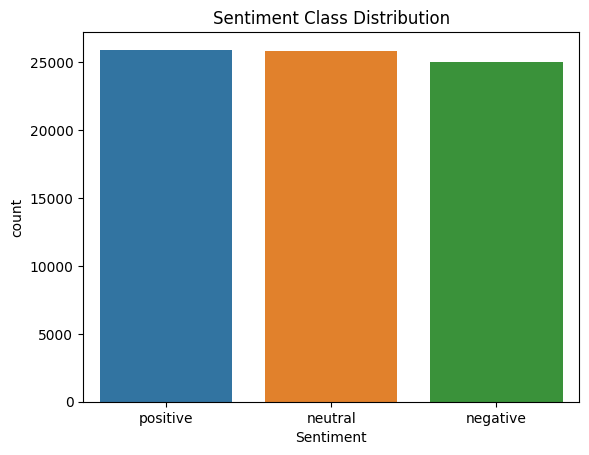

In [9]:
# Check class balance
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Class Distribution')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode Sentiment labels (e.g., Positive/Negative -> 1/0)
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Create pipeline: TF-IDF + Logistic Regression (simple, accurate for text)
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('lr', LogisticRegression(max_iter=200))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, stop_words='english')),
                ('lr', LogisticRegression(max_iter=200))])

In [13]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Full classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.7660517567303304
              precision    recall  f1-score   support

    negative       0.77      0.81      0.79      4976
     neutral       0.70      0.58      0.64      5257
    positive       0.81      0.91      0.86      5108

    accuracy                           0.77     15341
   macro avg       0.76      0.77      0.76     15341
weighted avg       0.76      0.77      0.76     15341



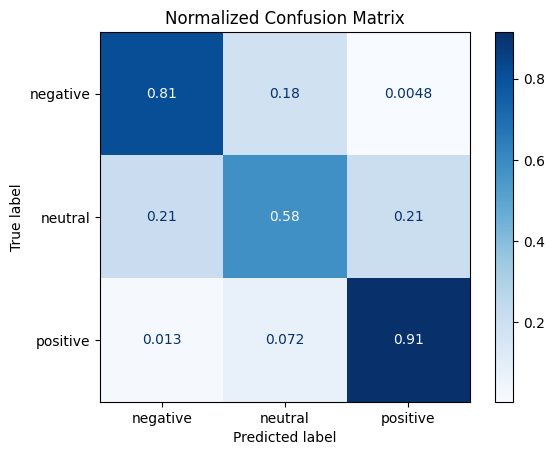

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.show()